# Understanding Mall customers

In this exercise, you work for a consulting firm as data scientist. In this scenario, your client is the owner of a Mall and he wants to understand the customers who can easily buy.  

You dispose of a dataset from the mall dataset with 5 features :
- CustomerID of the customer
- Gender of the customer
- Age of the customer
- Annual Income of the customer in k$
- Spending Score assigned by the mall based on customer behavior and spending nature (1-99)


You have one day to perform this analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

In [4]:
mall_df = pd.read_csv('https://simplonline-v3-prod.s3.eu-west-3.amazonaws.com/media/file/csv/b403357c-9456-4e37-acbf-ac5e679a7039.csv')
mall_df.head()
enc = OrdinalEncoder()
mall_df[['Gender']] = enc.fit_transform(mall_df[['Gender']])
mall_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1.0,19,15,39
1,2,1.0,21,15,81
2,3,0.0,20,16,6
3,4,0.0,23,16,77
4,5,0.0,31,17,40
...,...,...,...,...,...
195,196,0.0,35,120,79
196,197,0.0,45,126,28
197,198,1.0,32,126,74
198,199,1.0,32,137,18


# Customer Segmentation using different clustering methods

Try to perform different Clustering methods (e.g. k-means, agglomerative, DBSCAN, Gaussian) to create clusters and understand behaviors

https://machinelearningmastery.com/clustering-algorithms-with-python/

https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68

In [16]:
import seaborn as sns
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

# permet d'afficher les graphiques dans un notebook
%matplotlib inline

# Conclusions

C:\Users\Simplon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


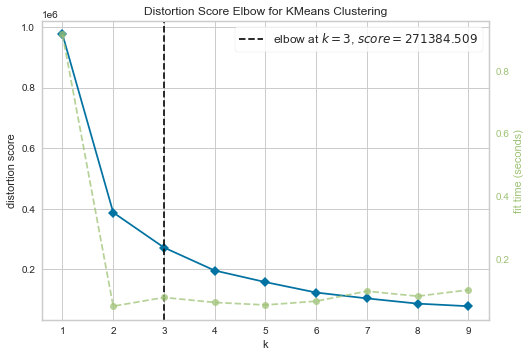

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
from sklearn.cluster import KMeans
#pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X= mall_df

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

In [9]:
# import pickle
kmeans = mall_df

kmeansed = KMeans(n_clusters =3,init='k-means++').fit(kmeans)
#pickle.dump(kmeansed, open('../DATA/kmean.sav', 'wb'))
kmeansed.labels_
kmeans['kmeans_cluster'] = kmeansed.predict(kmeans)

In [12]:
pd.set_option('display.max_rows', None)
clusterer = kmeans
clusterer.head()

# df['Full Date'] = df['Day'].map(str) + '-' + df['Month'].map(str) + '-' + df['Year'].map(str)
# print (df)
clusterer['kmeans_cluster'].value_counts()

2    71
0    68
1    61
Name: kmeans_cluster, dtype: int64

In [17]:
palette = plt.get_cmap("Dark2")
couleurs = dict(zip(mall_df["Gender"].drop_duplicates(), palette(range(2))))
couleurs

{1.0: array([0.10588235, 0.61960784, 0.46666667, 1.        ]),
 0.0: array([0.85098039, 0.37254902, 0.00784314, 1.        ])}

In [22]:
position = dict(zip(couleurs.keys(), range(2)))
position

{1.0: 0, 0.0: 1}

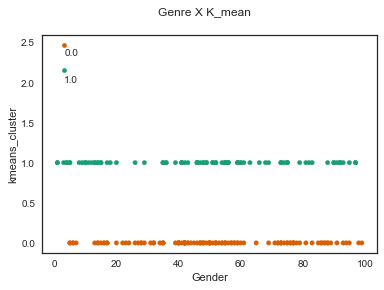

In [224]:
# Affichage des points avec une liste de couleurs
mall_df.plot.scatter(x = "Spending Score (1-100)", y = "Gender", c = [couleurs[p] for p in mall_df["Gender"]])
# boucle pour afficher la légende
for cont, coul in couleurs.items():
    plt.scatter(3, position[cont] / 3.2 + 2.15, c = [coul], s = 20)
    plt.text(3.2, position[cont] / 3 + 2, cont)
plt.xlabel("Gender") 
plt.ylabel("kmeans_cluster")
plt.suptitle("Genre X K_mean")
plt.show()

In [225]:
g_pca = seaborn.boxplot("Gender", "Spending Score (1-100)", hue = "kmeans_cluster", data = mall_df)
g_pca.set(xlabel = "Gender", ylabel = "Spending")


C:\Users\Simplon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret input 'kmeans_cluster'

In [226]:
# importing plotting library 
import matplotlib.pyplot as plt
# Create Sample data
from sklearn.datasets import make_moons
X = StandardScaler().fit_transform(mall_df)

In [239]:
## Finding best values of eps and min_samples
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
 
# Defining the list of hyperparameters to try
eps_list=np.arange(start=8, stop=12.75, step=0.25)
min_sample_list=np.arange(start=3, stop=10, step=1)
 
# Creating empty data frame to store the silhouette scores for each trials
silhouette_scores_data=mall_df
 
for eps_trial in eps_list:
    for min_sample_trial in min_sample_list:
        
        # Generating DBSAN clusters
        db = DBSCAN(eps=eps_trial, min_samples=min_sample_trial)
        
        if(len(np.unique(db.fit_predict(X)))>1):
            sil_score=silhouette_score(X, db.fit_predict(X))
        else:
            continue
        trial_parameters="eps:" + str(eps_trial.round(1)) +" min_sample :" + str(min_sample_trial)
        
        silhouette_scores_data=silhouette_scores_data.append(pd.mall_df(data=[[sil_score,trial_parameters]], columns=["score", "parameters"]))
 
# Finding out the best hyperparameters with highest Score
silhouette_scores_data.sort_values(by='score', ascending=False).head(1)


# no_of_clusters = []
# sil_score = []
# DBSCAN_params = []
# for p in DBSCAN_params:
#     DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics)
#     no_of_clusters.append(len(np.unique(DBSclustering.labels)))
#     sil_score.append(silhouette_score(X_numerics, DBSclustering.labels))
# eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
# min_samples = np.arange(3,10) # min_samples values to be investigated
# DBSCAN_params = list(product(eps_values, min_samples))


KeyError: 'score'

In [142]:
silhouette_scores_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),score,parameters
0,1.0,1.0,19.0,15.0,39.0,NaN,NaN
1,2.0,1.0,21.0,15.0,81.0,NaN,NaN
2,3.0,0.0,20.0,16.0,6.0,NaN,NaN
3,4.0,0.0,23.0,16.0,77.0,NaN,NaN
4,5.0,0.0,31.0,17.0,40.0,NaN,NaN
5,6.0,0.0,22.0,17.0,76.0,NaN,NaN
6,7.0,0.0,35.0,18.0,6.0,NaN,NaN
7,8.0,0.0,23.0,18.0,94.0,NaN,NaN
8,9.0,1.0,64.0,19.0,3.0,NaN,NaN
9,10.0,0.0,30.0,19.0,72.0,NaN,NaN


In [88]:
X

array([[-1.7234121 ,  1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.70609137,  1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-1.68877065, -0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-1.67144992, -0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-1.6541292 , -0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-1.63680847, -0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-1.61948775, -0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-1.60216702, -0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [-1.5848463 ,  1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-1.56752558, -0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [-1.55020485,  1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-1.53288413, -0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-1.5155634 , -0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-1.49824268, -0.88640526, -1.0

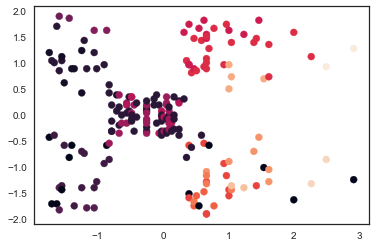

In [150]:
# DBSCAN Clustering
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.7, min_samples=2)
# Plotting the clusters
plt.scatter(x= X[:,3], y= X[:,4], c=db.fit_predict(X))

In [174]:
cp = mall_df.cp

AttributeError: 'DataFrame' object has no attribute 'cp'

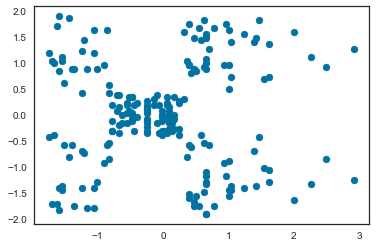

In [126]:
# mean shift clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MeanShift
from matplotlib import pyplot
# define dataset
X = StandardScaler().fit_transform(mall_df)
# define the model
model = MeanShift()
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 3], X[row_ix, 4])
# show the plot
pyplot.show()

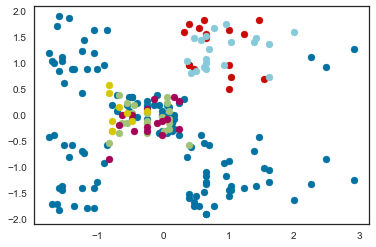

In [141]:
# optics clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import OPTICS
from matplotlib import pyplot
# define dataset
# define the model
model = OPTICS(eps=0.5, min_samples=9)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 3], X[row_ix, 4])
# show the plot
pyplot.show()

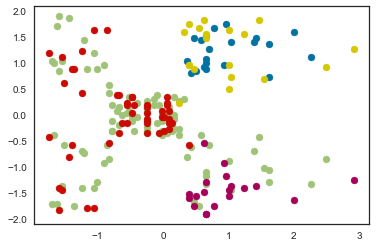

In [217]:
# spectral clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
# define dataset
X = StandardScaler().fit_transform(mall_df)
# define the model
model = SpectralClustering(n_clusters=5, n_components=5)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 3], X[row_ix, 4])
# show the plot
pyplot.show()

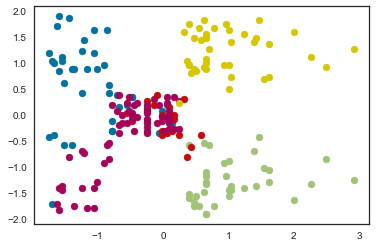

In [210]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
from sklearn.metrics import *
# define dataset
X = StandardScaler().fit_transform(mall_df)
model = GaussianMixture(n_components=5,covariance_type='spherical')
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 3], X[row_ix, 4])
# show the plot
pyplot.show()

In [168]:
model.means_

array([[ 1.05658919,  0.18133598,  0.1120119 ,  1.00259327, -1.19552032],
       [-0.51963023,  1.12623712,  1.38929684, -0.46759313, -0.36023132],
       [-0.84277355, -0.11372012, -0.86513802, -0.81468433,  0.25783905],
       [ 1.0415058 ,  0.03401282, -0.44814403,  0.96791335,  1.19389045],
       [-0.47414629, -0.88577947,  0.8999937 , -0.41859079, -0.26351669]])

In [211]:
silhouette_score(X,yhat)

0.24077679824461995